In [1]:
!ls

sample_data


In [2]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2023-09-19 18:40:52--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.104.140, 52.217.85.156, 3.5.28.186, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.104.140|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  16.0MB/s    in 20m 9s  

2023-09-19 19:01:01 (15.3 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [3]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2023-09-19 19:01:01--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.206.1, 52.216.165.227, 3.5.28.172, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.206.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  15.6MB/s    in 52s     

2023-09-19 19:01:54 (15.1 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [4]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2023-09-19 19:01:54--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.226.65, 3.5.21.195, 52.217.235.97, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.226.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.0MB/s    in 17s     

2023-09-19 19:02:11 (14.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [5]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2023-09-19 19:02:11--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.32.225, 52.217.173.25, 52.217.16.100, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.32.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  15.9MB/s    in 72s     

2023-09-19 19:03:23 (15.3 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [6]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [7]:
%%capture
!unzip annotations_trainval2017.zip

In [8]:
%%capture
!unzip train2017.zip

In [9]:
%%capture
!unzip val2017.zip

In [10]:
!pip install torch==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.


In [11]:
import torch
print(torch.__version__)

1.11.0+cu102


In [12]:
!pip install gluoncv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00


In [13]:
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [14]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [15]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

/usr/local/lib/python3.10/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.11.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


loading annotations into memory...
Done (t=30.66s)
creating index...
index created!
loading annotations into memory...
Done (t=0.51s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


In [16]:
print(len(train_dataset))

117266


(2, 5)
Image size (height, width, RGB): (640, 480, 3)
Num of objects: 2
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[314.68 552.44 450.78 639.  ]
 [  1.12 370.34 118.05 566.2 ]]
Class IDs (num_boxes, ):
 [[61.]
 [71.]]


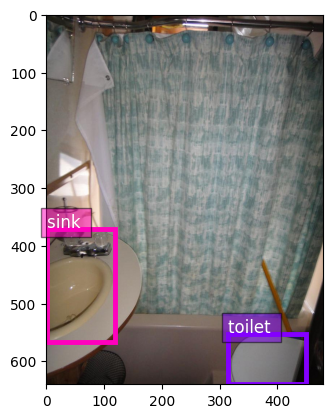

In [17]:
train_image, train_label = train_dataset[37572]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [18]:
print(len(train_dataset))

117266


In [19]:
#OpenCV demo

def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))




(1, 5)
[[  0.96 228.08 316.61 418.99]]
[[2.]]
<class 'numpy.ndarray'>


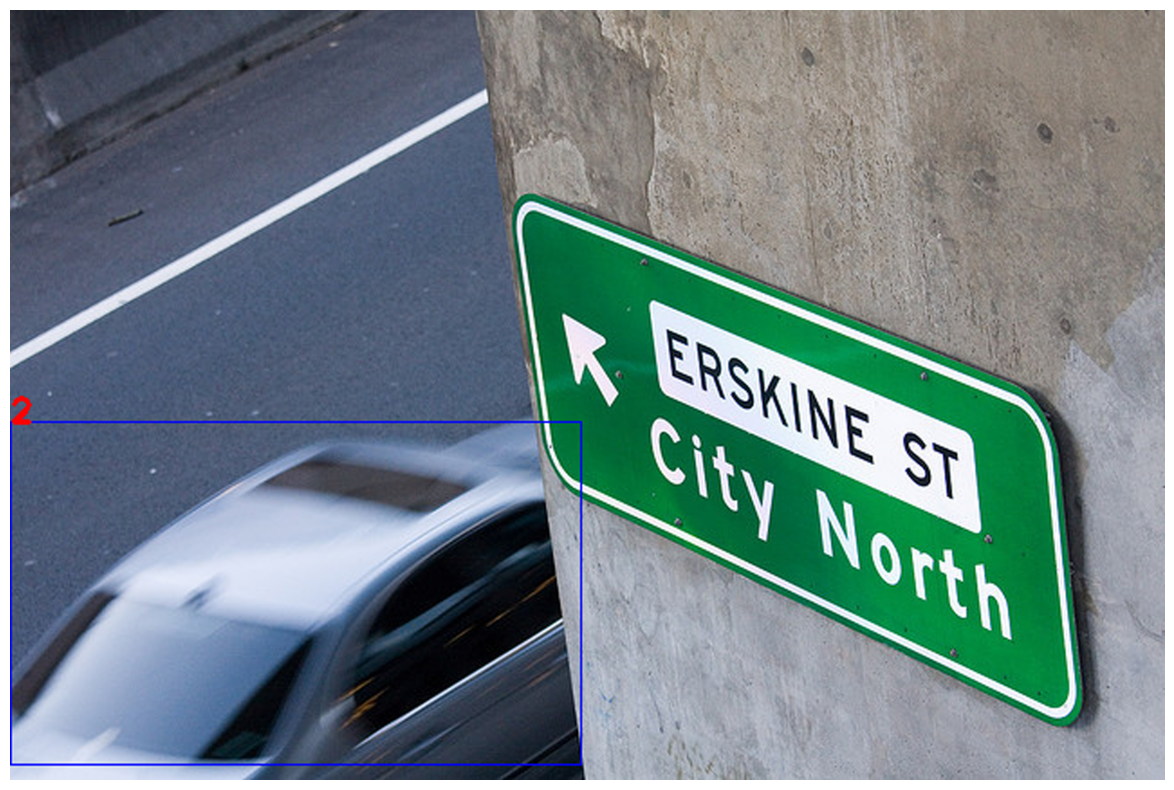

In [20]:
import cv2
import numpy as np


train_image, train_label = train_dataset[97552]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)



print(bounding_boxes)
print(class_ids)

train_image = train_image.asnumpy()
print(type(train_image))
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)


for i in range(len(class_ids)):

  class_id = str(int(class_ids[i][0]))
  bbox = bounding_boxes[i]

  x1 = int(bbox[0])
  y1 = int(bbox[1])
  x2 = int(bbox[2])
  y2 = int(bbox[3])


  cv2.rectangle(train_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
  cv2.putText(train_image,class_id, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, .6,(0, 0, 255),2)






imShowCv(train_image)


In [21]:
def yolo_format(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_1[0] + point_2[0]) / float(2.0 * width)
    y_center = (point_1[1] + point_2[1]) / float(2.0 * height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(class_index) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)

def save_bb(txt_path, line):
    with open(txt_path, 'a') as myfile:
        myfile.write(line + "\n") # append line

In [22]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [23]:
!mkdir bbox_txt
!mkdir images

In [24]:
import cv2
import os

n=0
imgFolder = 'images'
txtFolder = 'bbox_txt'

#id of your class in training of the YOLOv3 model
label_class_id = 0



for i in range(len(train_dataset)):

  if i % 500 == 0:
    print(i)
    print('images of interest',n)

  train_image, train_label = train_dataset[i]
  bounding_boxes = train_label[:, :4]
  class_ids = train_label[:, 4:5]



  if 2 in class_ids: #cambiar el id

    name = 'carrot_'+str(n)
    txtPath = os.path.join(txtFolder, name)+'.txt'
    imgPath = os.path.join(imgFolder, name) +'.jpg'
    #print(txtPath, imgPath)




    #utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    #labels=class_ids, class_names=train_dataset.classes)


    image = train_image.asnumpy()
    height, width = image.shape[:2]

    #print(bounding_boxes)
    #print(class_ids)


    for j in range(len(class_ids)):

      if class_ids[j]==2: #el ID que se tiene que cambiar para que reconozca placas


        x1 = int(bounding_boxes[j][0])
        y1 = int(bounding_boxes[j][1])
        x2 = int(bounding_boxes[j][2])
        y2 = int(bounding_boxes[j][3])



        line = yolo_format(label_class_id,(x1,y1),(x2,y2),width, height)
        save_bb(txtPath, line)


    n+=1


        #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)


    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(imgPath,image)

    #plt.show()

print(n)

0
images of interest 0
500
images of interest 47
1000
images of interest 112
1500
images of interest 161
2000
images of interest 204
2500
images of interest 261
3000
images of interest 318
3500
images of interest 374
4000
images of interest 435
4500
images of interest 490
5000
images of interest 541
5500
images of interest 590
6000
images of interest 650
6500
images of interest 703
7000
images of interest 752
7500
images of interest 806
8000
images of interest 862
8500
images of interest 922
9000
images of interest 973
9500
images of interest 1030
10000
images of interest 1074
10500
images of interest 1131
11000
images of interest 1181
11500
images of interest 1230
12000
images of interest 1287
12500
images of interest 1343
13000
images of interest 1408
13500
images of interest 1462
14000
images of interest 1517
14500
images of interest 1563
15000
images of interest 1616
15500
images of interest 1670
16000
images of interest 1724
16500
images of interest 1766
17000
images of interest 1

In [25]:
!zip -r label.zip bbox_txt images

Se han truncado las últimas 5000 líneas del flujo de salida.
  adding: images/carrot_10267.jpg (deflated 0%)
  adding: images/carrot_1887.jpg (deflated 0%)
  adding: images/carrot_2480.jpg (deflated 3%)
  adding: images/carrot_3589.jpg (deflated 3%)
  adding: images/carrot_4048.jpg (deflated 0%)
  adding: images/carrot_2868.jpg (deflated 3%)
  adding: images/carrot_10907.jpg (deflated 3%)
  adding: images/carrot_10701.jpg (deflated 0%)
  adding: images/carrot_9593.jpg (deflated 2%)
  adding: images/carrot_8479.jpg (deflated 0%)
  adding: images/carrot_10425.jpg (deflated 4%)
  adding: images/carrot_10905.jpg (deflated 0%)
  adding: images/carrot_443.jpg (deflated 3%)
  adding: images/carrot_7604.jpg (deflated 0%)
  adding: images/carrot_1892.jpg (deflated 2%)
  adding: images/carrot_9022.jpg (deflated 0%)
  adding: images/carrot_5534.jpg (deflated 1%)
  adding: images/carrot_3071.jpg (deflated 0%)
  adding: images/carrot_778.jpg (deflated 0%)
  adding: images/carrot_4615.jpg (deflated 

In [26]:
#CODIGO PARA CONECTAR GOOGLE DRIVE A COLAB
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
print(len(os.listdir('images')))
print(len(os.listdir('bbox_txt')))

12251
12251


In [31]:
#CODIGO PARA GUARDAR UN ZIP EN DRIVE
import shutil

# Ruta del archivo ZIP que deseas copiar
ruta_original = '/content/label.zip'

# Ruta donde deseas guardar el archivo ZIP en Google Drive
ruta_destino = '/content/gdrive/My Drive/mi_archivoLABEL.zip'

# Copiar archivo ZIP
shutil.copy(ruta_original, ruta_destino)
#DatasetsPlacas


'/content/gdrive/My Drive/mi_archivoLABEL.zip'

In [32]:
!ls "/content/gdrive/My Drive/"


carta_natação.pdf  Classroom  Marcelo  Matricula2023.pdf  mi_archivoLABEL.zip


In [33]:
!git clone https://github.com/Arijit1080/Licence-Plate-Detection-using-YOLO-V8.git

Cloning into 'Licence-Plate-Detection-using-YOLO-V8'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 133 (delta 4), reused 8 (delta 3), pack-reused 117
Receiving objects: 100% (133/133), 14.73 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [34]:
cd /content/Licence-Plate-Detection-using-YOLO-V8

/content/Licence-Plate-Detection-using-YOLO-V8


In [35]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

In [36]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 277.0/317.1 MB 46.2 MB/s eta 0:00:01ERROR: Could not install packages due to an OSError: [Errno 28] No spa

In [ ]:
pip install scikit-learn